# Exploratory

[See project](/home/gera/Documentos/Proyectos/portfolio/credit_prediction/docs/project_details.ipynb)
<hr/>

Exploratorio
1. Importar las librerías necesarias para el exploratorio.
2. Importar el csv en el que se encuentra el set de datos.
3. Usar las funciones necesarias para explicar el contenido del set de datos (¿de qué son los datos?
¿Qué significan? ¿Qué información hay en cada columna?)
4. ¿Cuáles variables tienen datos numéricos y cuáles categóricos?
5. ¿Qué datos tienen las variables categóricas? Describir las columnas numéricas (media,
percentiles)
6. ¿Alguna variable tienen NaNs, valores incompletos o ceros excesivos? ¿Cómo resolvería cada
caso?
<hr/>

1. Importar las librerías necesarias para el exploratorio.

In [22]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns

from string import ascii_letters

2. Importar el csv en el que se encuentra el set de datos.

In [9]:
df_raw = pd.read_csv('../data/raw/Dataset_ejercicio.csv')

Usar las funciones necesarias para explicar el contenido del set de datos (¿de qué son los datos?¿Qué significan? ¿Qué información hay en cada columna?)

In [3]:
df_raw.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# TotalCharges must be float64
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')
df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].astype('str')

In [11]:
df_raw['SeniorCitizen'] = df_raw.apply(lambda x: 'Yes' if x['SeniorCitizen'] == '1' else 'No', axis=1)

In [12]:
# number of columns
print(f'The dataframe contains {df_raw.shape[1]} columns and {df_raw.shape[0]} rows')
# number of categorical columns
print(f'Object format columns are: \n {df_raw.select_dtypes(include=object).columns.tolist()}')
# number of numeric columns
print(f'Numeric format columns are: \n {df_raw.select_dtypes(include=np.number).columns.tolist()}')
# number of nan/null
print(f'The dataframe contains NaN values: \n {df_raw.isnull().count()}')

# MISMA CANTIDAD DE NÚMEROS QUE DE NAN, RAAAARO

The dataframe contains 22 columns and 7043 rows
Object format columns are: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numeric format columns are: 
 ['Unnamed: 0', 'tenure', 'MonthlyCharges', 'TotalCharges']
The dataframe contains NaN values: 
 Unnamed: 0          7043
customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges     

In [13]:
df_raw.sample(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
599,599,0374-FIUCA,Male,No,Yes,No,65.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.4,1414.45,No
3061,3061,8118-LSUEL,Male,Yes,No,No,23.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.4,2483.50,Yes
1025,1025,7868-TMWMZ,Female,Yes,Yes,No,60.0,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.0,6668.35,No
4894,4894,0533-UCAAU,Male,Yes,Yes,No,57.0,Yes,Yes,DSL,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),71.1,4140.10,No
246,246,0303-UNCIP,Male,No,No,No,41.0,Yes,Yes,DSL,...,Yes,No,No,Yes,One year,No,Mailed check,65.0,2531.80,No


In [40]:
mask = df_raw.isnull() == True
df_raw[mask]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_raw.dropna(axis=0, how='any', inplace= True)
df_raw.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
mask2 = df_raw.notnull()
df_churn = df_raw[mask2]

In [16]:
df_churn.sample(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6181,6181,4937-QPZPO,Male,No,Yes,Yes,61.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,99.90,6241.35,No
588,588,0742-LAFQK,Male,No,Yes,No,72.0,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Two year,Yes,Electronic check,99.15,7422.10,No
5897,5897,0562-HKHML,Male,No,Yes,Yes,71.0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),23.90,1626.40,No
6453,6453,8634-MPHTR,Male,Yes,Yes,No,47.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.05,4871.05,Yes
3649,3649,0174-QRVVY,Male,No,Yes,Yes,71.0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.35,1847.55,No


In [30]:
numeric_features = df_churn[['MonthlyCharges','TotalCharges']]

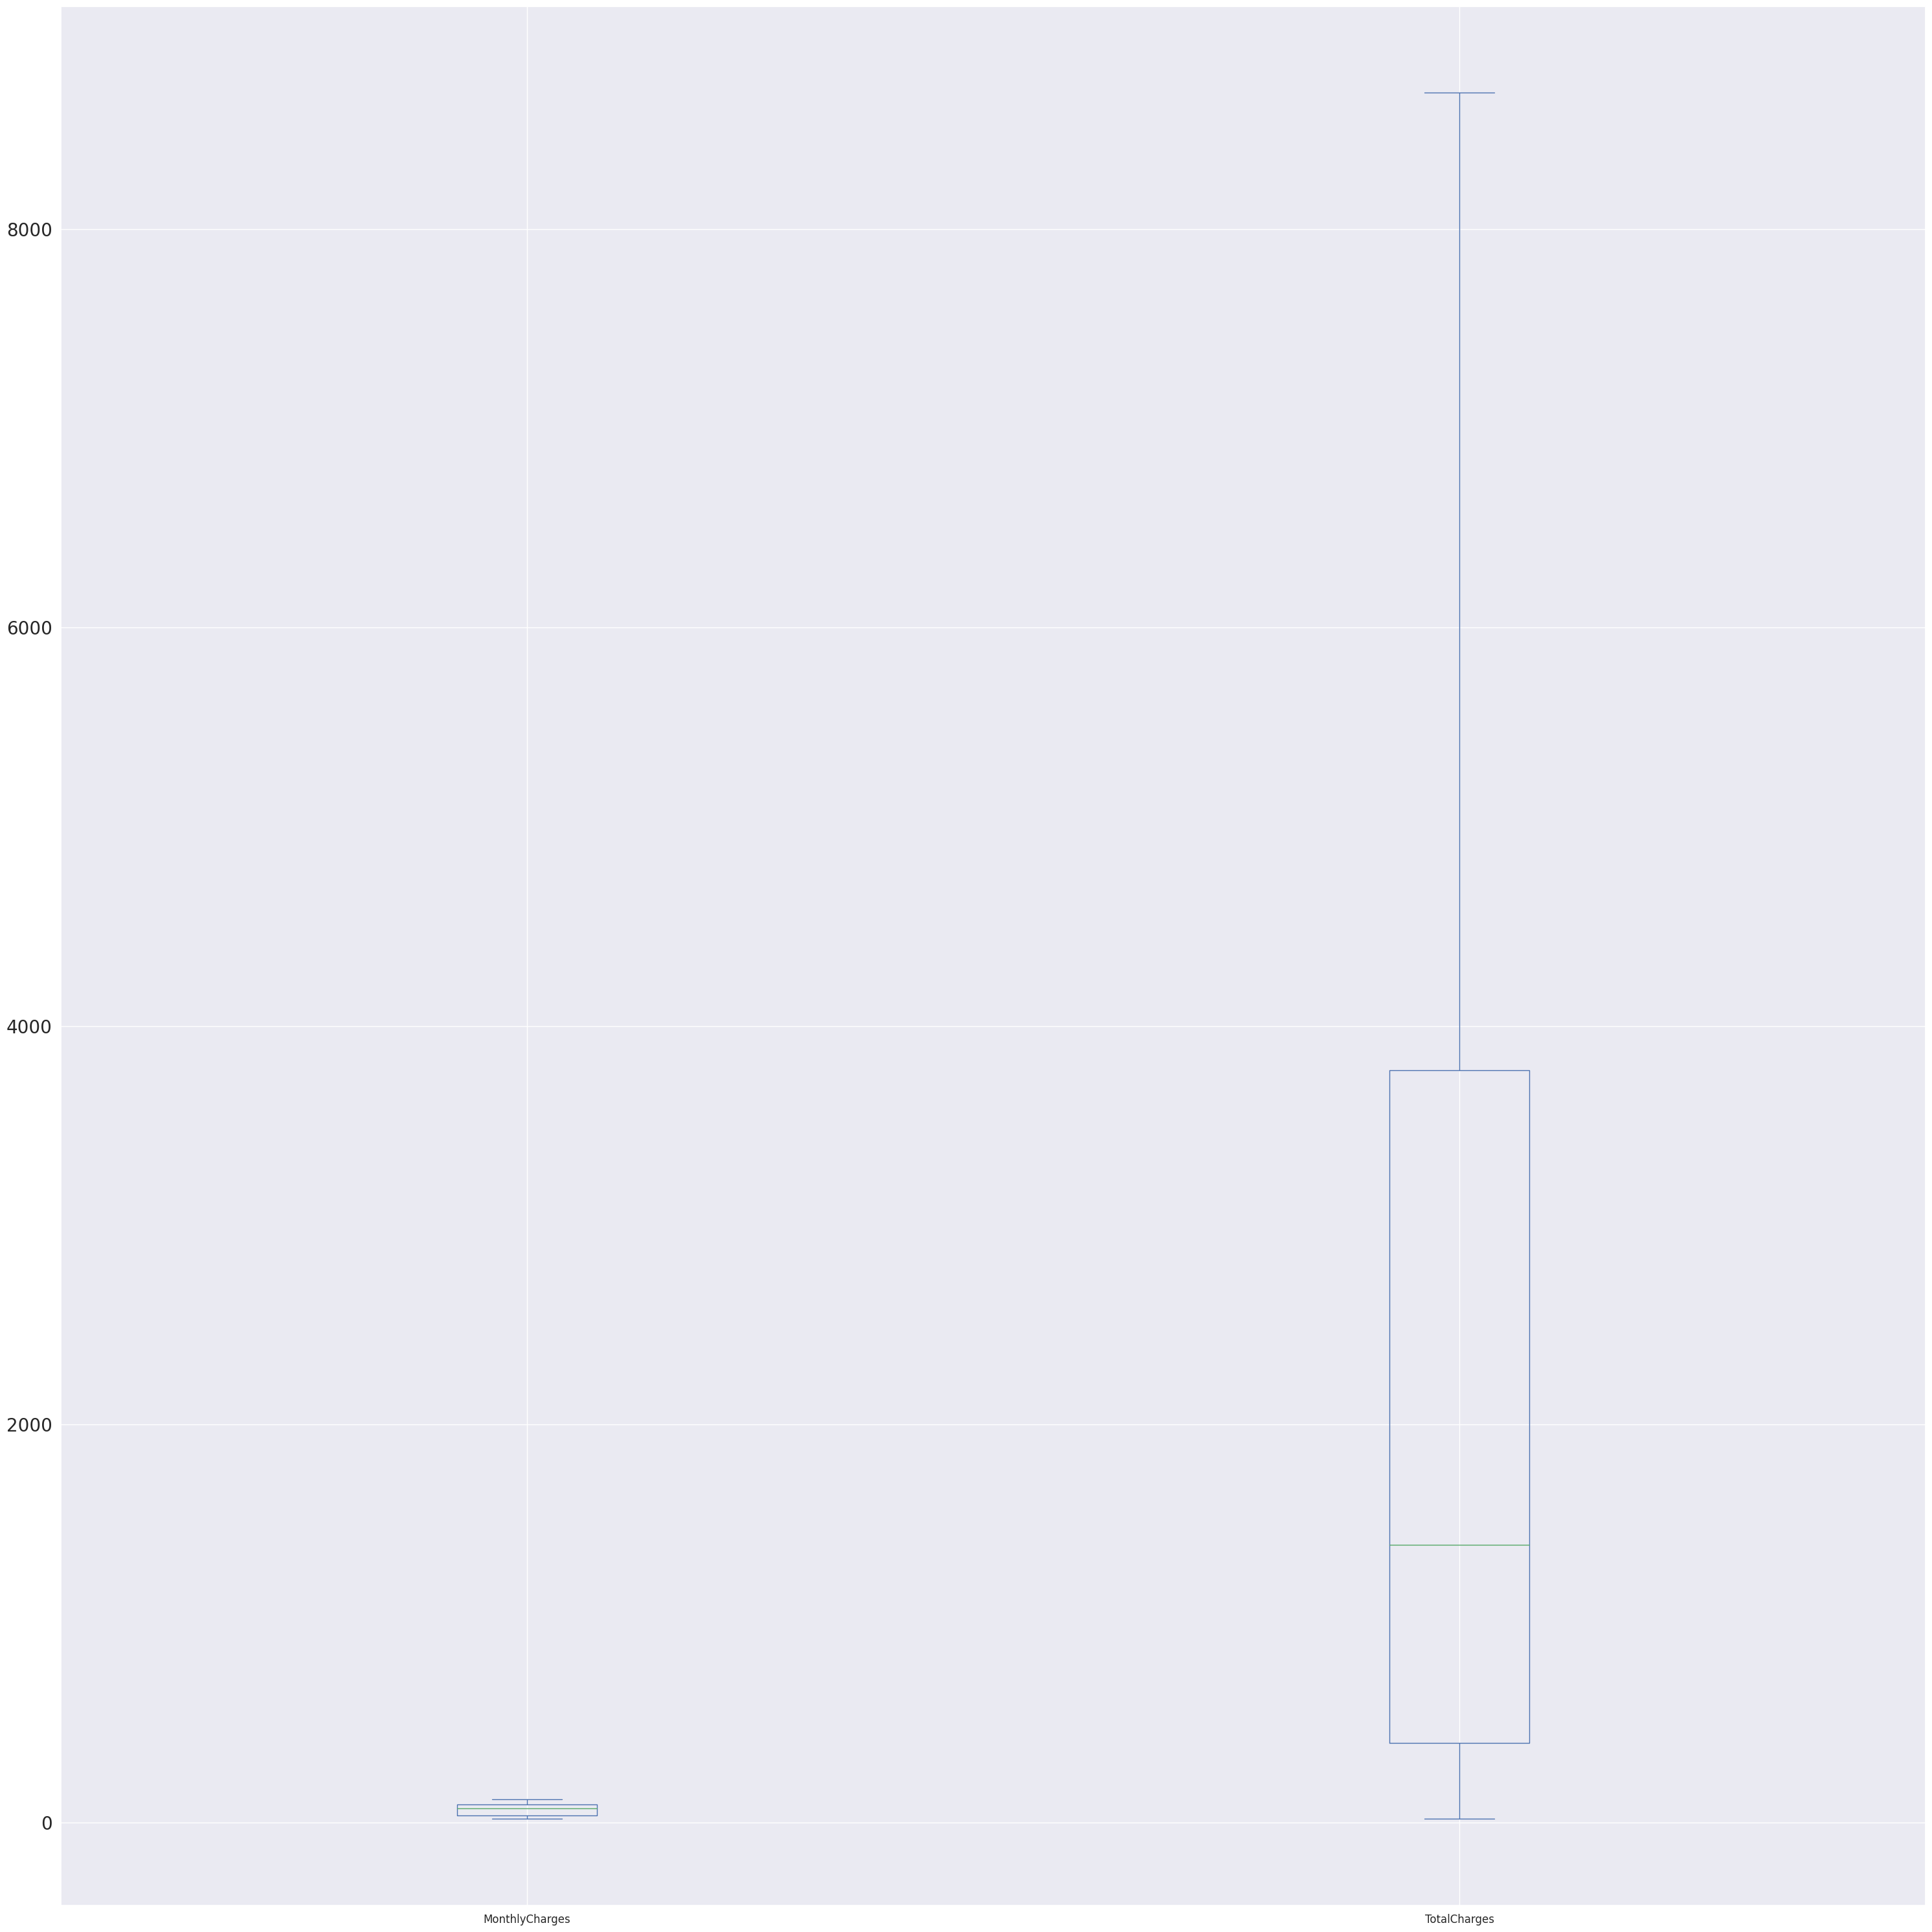

In [31]:
# Visualizacion de outliers

plt.rcParams["figure.figsize"] = [30, 30]
plt.rcParams["figure.autolayout"] = True

ax = numeric_features[['MonthlyCharges','TotalCharges']].plot(kind='box')
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
q1= np.percentile(numeric_features,25)
q3= np.percentile(numeric_features,75)

numeric_features['MonthlyCharges'] = numeric_features.MonthlyCharges.clip(lower=q1, upper=q3)
numeric_features['TotalCharges']  = numeric_features.TotalCharges.clip(lower=q1, upper=q3)

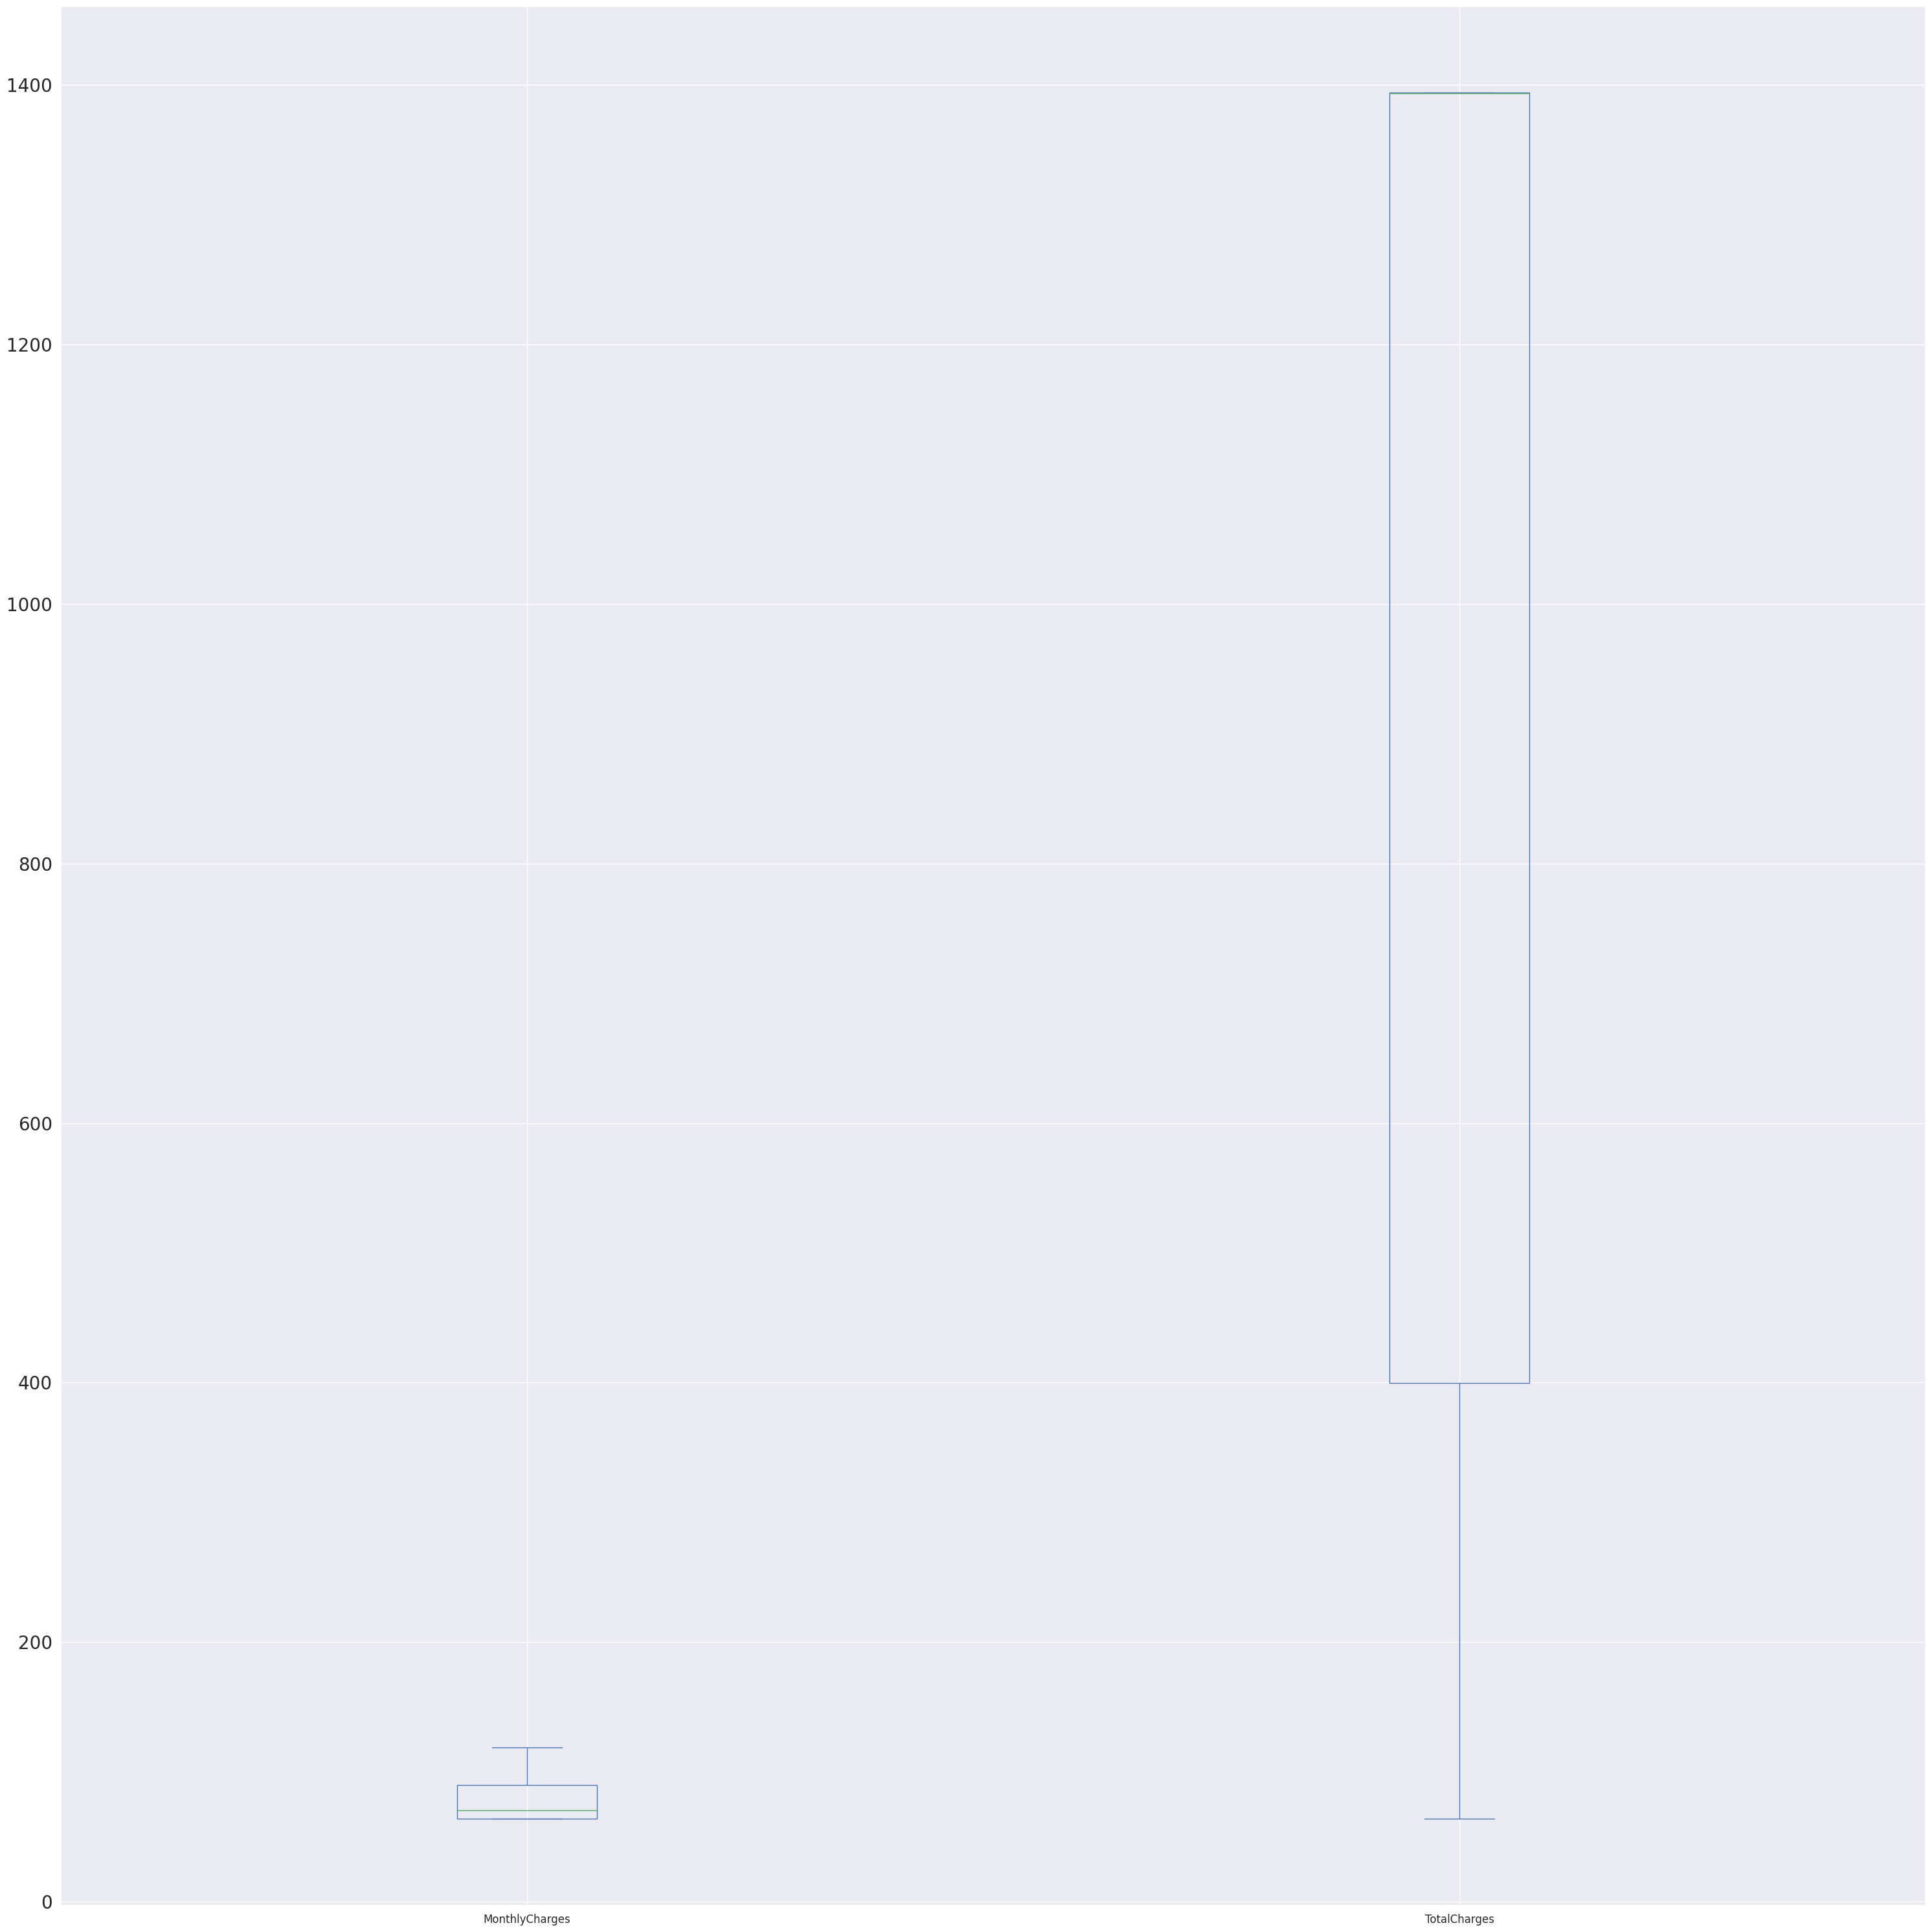

In [55]:
plt.rcParams["figure.figsize"] = [30, 30]
plt.rcParams["figure.autolayout"] = True

ax = numeric_features[['MonthlyCharges','TotalCharges']].plot(kind='box')
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

plt.show()

In [60]:
correlation = numeric_features.corr(method='pearson')

In [61]:
correlation

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.446492
TotalCharges,0.446492,1.000000


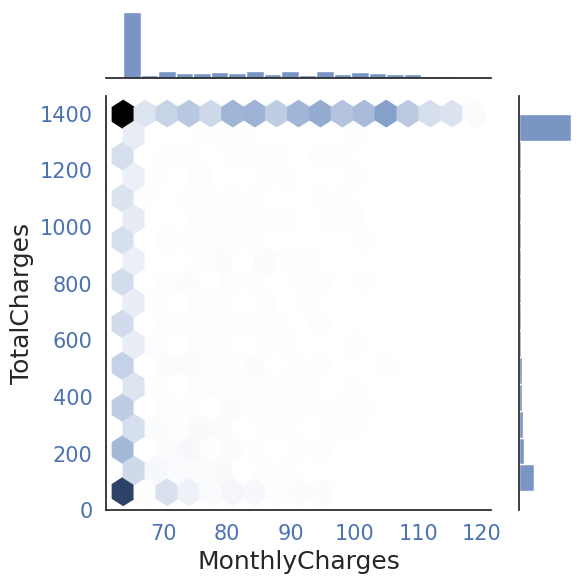

In [62]:
sns.set()

with sns.axes_style('white'):
    sns.jointplot(x = "MonthlyCharges", y = "TotalCharges", data = numeric_features, kind='hex')
    plt.xlabel('MonthlyCharges', fontsize= 18)
    plt.ylabel('TotalCharges', fontsize= 18)
plt.xticks(fontsize = 15, color='b')
plt.yticks(fontsize = 15, color= 'b')
plt.show()

In [44]:
df_churn.to_csv('../data/preprocessed/churn_preprocessed.csv')